#### 1. *Data Wrangling With Python*: Activity 9, page 294

In [1]:
# import required libraries

import urllib.request, urllib.parse, urllib.error # to read XML data from internet
import requests # API to make requests
from bs4 import BeautifulSoup # HTML parser package
import ssl # to check certificate
import re # RegEx module

In [2]:
# Check SSL certificate

cert = ssl.create_default_context()
cert.check_hostname = False
cert.verify_mode = ssl.CERT_NONE

In [3]:
# Read HTML from URL by assigning url as string
# Use requests library and get method to get response
# The response is a model data structure of requests library

url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)
type(response)

requests.models.Response

In [4]:
# Create a function to check status of web request
# 200 code status means the request is successful
# while the other code results have different failure 
# descriptions/meanings.
# The response is passed to the function

def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1


In [5]:
# Use function to check encoding by passing in repsonse
# The response is UTF-8 character encoding scheme

def encoding_check(r):
    return (r.encoding)

encoding_check(response)

'UTF-8'

In [6]:
# Use function to decode the contents of the response 
# Check that the content type is string

def decode_content(r,encoding):
    return (r.content.decode(encoding))
contents = decode_content(response, encoding_check(response))
type(contents)

str

In [7]:
# Pass the entire HTML string to BeautifulSoup for parsing
# Use html.parser because the string is HTML content

soup = BeautifulSoup(contents, 'html.parser')

In [8]:
# Create an empty list to hold the href tags
# href tags store hyperlinks

href_tags = []

# Find all href tags and add to empty list created
for link in soup.find_all('a'):
    href_tags.append(link.get('href'))
    
# print first 30 elements of the list
href_tags[:30]

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/25525',
 '/ebooks/1635',
 '/ebooks/1661',
 '/ebooks/2701',
 '/ebooks/74',
 '/ebooks/1952',
 '/ebooks/98',
 '/ebooks/62740',
 '/ebooks/46']

In [9]:
href_tags[19:119]

['/ebooks/1342',
 '/ebooks/11',
 '/ebooks/25525',
 '/ebooks/1635',
 '/ebooks/1661',
 '/ebooks/2701',
 '/ebooks/74',
 '/ebooks/1952',
 '/ebooks/98',
 '/ebooks/62740',
 '/ebooks/46',
 '/ebooks/76',
 '/ebooks/1080',
 '/ebooks/84',
 '/ebooks/5200',
 '/ebooks/514',
 '/ebooks/1184',
 '/ebooks/2591',
 '/ebooks/205',
 '/ebooks/2600',
 '/ebooks/2542',
 '/ebooks/62739',
 '/ebooks/120',
 '/ebooks/62741',
 '/ebooks/174',
 '/ebooks/4300',
 '/ebooks/345',
 '/ebooks/1232',
 '/ebooks/45',
 '/ebooks/16',
 '/ebooks/158',
 '/ebooks/408',
 '/ebooks/43',
 '/ebooks/16328',
 '/ebooks/62738',
 '/ebooks/844',
 '/ebooks/1260',
 '/ebooks/5740',
 '/ebooks/1497',
 '/ebooks/58975',
 '/ebooks/6130',
 '/ebooks/1727',
 '/ebooks/1400',
 '/ebooks/58585',
 '/ebooks/2554',
 '/ebooks/42108',
 '/ebooks/203',
 '/ebooks/730',
 '/ebooks/36',
 '/ebooks/19033',
 '/ebooks/55',
 '/ebooks/147',
 '/ebooks/6087',
 '/ebooks/768',
 '/ebooks/62734',
 '/ebooks/219',
 '/ebooks/135',
 '/ebooks/1998',
 '/ebooks/28054',
 '/ebooks/244',
 '/eb

In [10]:
# Create empty list for numerical digits
numeric = []

# We'll use indices 19 to 119 because that is where we have numbers
# in the links
# For each link in href_tags list, the link will be added and stripped
# of the text in the link
for i in range (19, 119):
    link = href_tags[i]
    link = link.strip()
    
    # RegEx to find numerical digits in each link
    n = re.findall('[0-9]+', link)
    
    # Add numerical digits as integers to empty list, numeric
    if len(n) == 1:
        numeric.append(int(n[0]))
        
print("\nBelow are the file numbers for the top 100 ebooks on Gutenberg.\n" + '-' * 70)
print(numeric)


Below are the file numbers for the top 100 ebooks on Gutenberg.
----------------------------------------------------------------------
[1342, 11, 25525, 1635, 1661, 2701, 74, 1952, 98, 62740, 46, 76, 1080, 84, 5200, 514, 1184, 2591, 205, 2600, 2542, 62739, 120, 62741, 174, 4300, 345, 1232, 45, 16, 158, 408, 43, 16328, 62738, 844, 1260, 5740, 1497, 58975, 6130, 1727, 1400, 58585, 2554, 42108, 203, 730, 36, 19033, 55, 147, 6087, 768, 62734, 219, 135, 1998, 28054, 244, 996, 902, 376, 27827, 113, 4363, 25717, 1019, 1399, 2814, 148, 766, 33283, 215, 62745, 8800, 2680, 3600, 2852, 160, 161, 25344, 1250, 62744, 2500, 28860, 100, 3825, 3207, 236, 39353, 62742, 62730, 12, 1228, 521, 62729, 62731, 863, 30254]


In [11]:
# .text method is used to print first 2000 characters in order
# to see what soup object's text looks like

print(soup.text[:2000])










 
Top 100 - Project Gutenberg








Online Book Catalog
=> 



 Book  Search
-- Recent  Books
-- Top  100
-- Offline Catalogs
-- My Bookmarks


Main Page




Project Gutenberg needs your donation! 
        More Info








Did you know that you can help us produce ebooks
by proof-reading just one page a day?
Go to: Distributed Proofreaders



Top 100


To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not considered.
Books made out of multiple files like most audio books are counted
if any file is downloaded.

Downloaded Books
2020-07-24152476
last 7 days1176983
last 30 days5364986

Pretty Pictures

Top 100 EBooks yesterday —
  Top 100 Authors yesterday —
  Top

In [12]:
# Create empty list for names of top 100 eBooks
names = []

# Start index will point at text specified
# Splitlines method of soup.text is used to split out lines of text

start = soup.text.splitlines().index('Top 100 EBooks yesterday')

# Use splitlines and loop to add strings of next 100 lines to empty list
for i in range(100):
    names.append(soup.text.splitlines()[start+2+i])

# Create empty list for titles
titles = []

# Use RegEx and find all to find name strings from soup object
# and add to empty list.  Match and span used to find indices
for i in range(100):
    id1, id2 = re.match('^[a-zA-Z ]*', names[i]).span()
    titles.append(names[i][id1:id2])

# Print list of titles
for a in titles:
    print(a)

Pride and Prejudice by Jane Austen 
Alice
The Works of Edgar Allan Poe
Ion by Plato 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
The Adventures of Tom Sawyer by Mark Twain 
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Tale of Two Cities by Charles Dickens 
Walker of the Secret Service by Melville Davisson Post 
A Christmas Carol in Prose
Adventures of Huckleberry Finn by Mark Twain 
A Modest Proposal by Jonathan Swift 
Frankenstein
Metamorphosis by Franz Kafka 
Little Women by Louisa May Alcott 
The Count of Monte Cristo
Grimms
Walden
War and Peace by graf Leo Tolstoy 
Et dukkehjem
King Leopold
Treasure Island by Robert Louis Stevenson 
The Jim Crow Car
The Picture of Dorian Gray by Oscar Wilde 
Ulysses by James Joyce 
Dracula by Bram Stoker 
Il Principe
Anne of Green Gables by L
Peter Pan by J
Emma by Jane Austen 
The Souls of Black Folk by W
The Strange Case of Dr
Beowulf
London as seen by Charles Dana Gibson by Charles Dana Gibson 
The Importance of Bei

#### 2. *Data Wrangling with Python*: Activity 10, page 295

In [13]:
import json # module for reading json file

In [14]:
# Load secret API key from JSON file
# use json.loads to read the file and store as json_data

json_file = 'APIkeyupdate.json'
json_data = json.loads(open(json_file).read())

In [15]:
# Check data type to confirm dictionary

type(json_data)

dict

In [16]:
# Open the json file and assign api key to variable

with open('APIkeyupdate.json') as data:
    keys = json.load(data)
    omdbapi = '7f3f0d1e'

In [17]:
# Assign OBDb portal as a string to a variable

service_url = 'http://www.omdbapi.com/?'

In [18]:
# Create variable with secret api key

api_key = '&apikey=' + omdbapi

In [19]:
# To obtain the keys of data

print(json_data.keys())

dict_keys(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'])


In [20]:
# Create function to print movie data from JSON file 
# Create list of dict keys in json_data
# Add dashed lines on top and bottom for visual appearance

def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
                'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
                'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 
                 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [21]:
# function to clean poster url by splitting at dot
# open and read the post url and save location
# save poster image and safely close

def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    save_location = os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(save_location):
        os.mkdir(save_location)
    file_name = save_location+str(title)+'.'+poster_file_extension
    f = open(file_name,'wb')
    f.write(poster_data)
    f.close

In [22]:
# function to search for movie title, if the response is true
# (successful), the info pulled will be printed and if a poster is 
# available, save_poster will be called to save the poster
# error handling is incorporated to print the error if the read is 
# not successful
# If the url cannot be accessed, try/except used and error will print

def search_movie(title):
    try:
        url = service_url + urllib.parse.urlencode({'t':str(title)})+api_key
        print(f'Retrieving the data of "{title}" now...')
        print(url)
        uh = urllib.request.urlopen(url)
        data1 = uh.read()
        json_data=json.loads(data1)
        
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ", json_data['Error'])
            
    except urllib.error.URLError as e:
        print(f"Error: {e.reason}")

In [23]:
# Search titanic to test search_movie function

search_movie('Titanic')

Retrieving the data of "Titanic" now...
http://www.omdbapi.com/?t=Titanic&apikey=7f3f0d1e
Error: Unauthorized


In [24]:
# Check that try/except loop for error catching works

search_movie("Random Error")

Retrieving the data of "Random Error" now...
http://www.omdbapi.com/?t=Random+Error&apikey=7f3f0d1e
Error encountered:  Movie not found!


In [25]:
search_movie("Homeward Bound")

Retrieving the data of "Homeward Bound" now...
http://www.omdbapi.com/?t=Homeward+Bound&apikey=7f3f0d1e
--------------------------------------------------
Title: Homeward Bound
Year: 1980
Rated: N/A
Released: 19 Nov 1980
Runtime: 120 min
Genre: Drama
Director: Richard Michaels
Writer: Burt Prelutsky
Actors: Moosie Drier, David Soul, Barnard Hughes, Judith Penrod
Plot: A divorced man and his estranged, incurably ill teenage son get together for a final summer vacation and they end up at the divorce's estranged father's vineyard where they try to reconsile their differences.
Language: English
Country: USA
Awards: Nominated for 2 Primetime Emmys. Another 1 win.
Poster: https://m.media-amazon.com/images/M/MV5BYzk0ZTg4ZDUtZjE4MS00YzdkLTliMjMtOTk1YTNkNmU4M2IxXkEyXkFqcGdeQXVyMTk5MjAyMjM@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.1/10'}]
Metascore: N/A
imdbRating: 7.1
imdbVotes: 106
imdbID: tt0080885
--------------------------------------------------


#### 3. Twitter API Data Pull

In [26]:
# import twitter library and enter credentials

import twitter

api = twitter.Api(consumer_key = 'NLUFv80aoAaPrhnzDtAhKWYRT', 
                 consumer_secret = 'qVThaLNNos39nYnPv4ptfdGyiuPuSvPmiJopCK53JSXFYHcEmR',
                 access_token_key = '1284257084436033536-Cj0SteG6G3GWZbvTKuKoMXAaAfDrQS',
                 access_token_secret = 'Kg2MGLMinplvGmeLgBtGFUQV6E2DpYAWSWpSLOQyqBOgS')

In [27]:
# print credential verification

print(api.VerifyCredentials())

{"created_at": "Fri Jul 17 22:42:15 +0000 2020", "default_profile": true, "default_profile_image": true, "id": 1284257084436033536, "id_str": "1284257084436033536", "name": "Gabrielle Beinars", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "GabrielleBeina1"}


In [28]:
# Use GetSearch to search tweets and pull data using search term 'big data'
# pull top five tweets

api.GetSearch('bigdata', count=5)

[Status(ID=1287018075276095489, ScreenName=KirkDBorne, Created=Sat Jul 25 13:33:15 +0000 2020, Text='One of the best-known books on #Statistics is now free for DOWNLOAD: Larry Wasserman’s "All of Statistics"\n\nhttps://t.co/E4NTk5d2hm \n\n#abdsc #BigData #DataScience #MachineLearning #AI #Probability #StatisticalLiteracy #Mathematics #DataMining https://t.co/GjTWDTp279'),
 Status(ID=1286905510243917824, ScreenName=stpiindia, Created=Sat Jul 25 06:05:57 +0000 2020, Text='#BigData can enable teachers for a more credible grading while brining precision, quality, and agility in the evaluation process. Explore how #STPINEURON is nurturing #startups to build similar solutions: https://t.co/vrqWlteqAI. #STPICoEs #STPIINDIA #STPIINCUBATION #GrowWithSTPI https://t.co/wNAw4u5u4U'),
 Status(ID=1287017683935002625, ScreenName=KirkDBorne, Created=Sat Jul 25 13:31:42 +0000 2020, Text='Download FREE #Probability eBook PDF: https://t.co/leXnVPtLdG\n———\n++Check out the top #Statistics Books — current 

#### 4. Create 3 visualizations using the provided data sets. 

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# load in data from csv file as DataFrame

df = pd.read_csv("multiTimeline.csv", header=1)

In [31]:
# Take a glimpse of the DataFrame to determine the best
# option for visualization

df.head()

,Month,Cupcake: (Worldwide)
0,2004-01,5
1,2004-02,6
2,2004-03,6
3,2004-04,5
4,2004-05,6


In [32]:
# Split month and year into seperate columns

df[['Year','Month']] = df['Month'].str.rsplit('-',expand=True)

In [33]:
# Confirm data looks okay

df.head()

,Month,Cupcake: (Worldwide),Year
0,01,5,2004
1,02,6,2004
2,03,6,2004
3,04,5,2004
4,05,6,2004


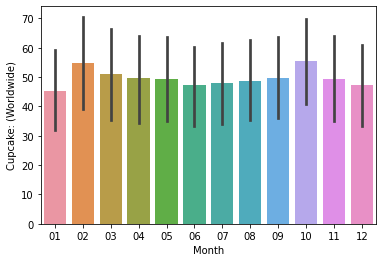

In [62]:
# Plot cupcake by month as bar plot using seaborn

plot_1 = sns.barplot(x='Month', y='Cupcake: (Worldwide)', data=df)
plot_1

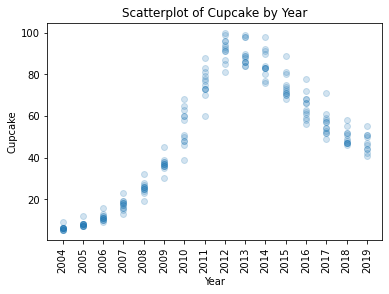

In [115]:
# Plot cupcake by year as scatterplot using matplotlib

plot_2 = plt.scatter(x=df['Year'], y=df['Cupcake: (Worldwide)'], alpha=0.2)
plt.title('Scatterplot of Cupcake by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Cupcake')
plt.show()

In [46]:
# Load in other csv file as DataFrame

df1 = pd.read_csv('geomap.csv', header=1)

In [47]:
# Take a glimpse of the DataFrame (20) to determine the best
# option for visualization

df1.head(20)

,Country,Cupcake: (1/1/04 - 11/1/19)
0,Falkland Islands (Islas Malvinas),NaN
1,Brunei,NaN
2,Jersey,NaN
3,Guernsey,NaN
4,Isle of Man,NaN
5,Bermuda,NaN
6,Curaçao,NaN
7,Belize,NaN
8,Trinidad & Tobago,NaN
9,Australia,100.0


In [48]:
# Check total number of observations/rows

df1.shape

(250, 2)

In [49]:
# It looks like this DataFrame has quite a few missing values

df1.isnull().sum()

Country                          0
Cupcake: (1/1/04 - 11/1/19)    195
dtype: int64

In [50]:
# Drop rows with NA values 

df1.dropna(inplace=True)

In [51]:
# Check total observations dropped

df1.shape

(55, 2)

Text(0.5, 1.0, 'Cupcake by Country (1/1/04 - 11/1/19)')

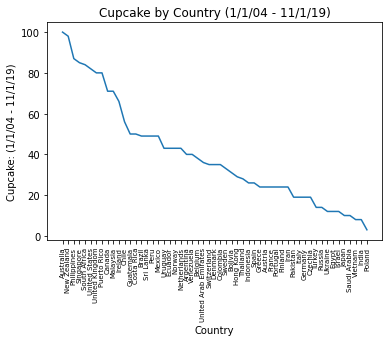

In [94]:
# Below is a line plot using matplotlib

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df1['Country'], df1['Cupcake: (1/1/04 - 11/1/19)'])
ax.set_xticklabels(df1['Country'],rotation=90, fontsize='x-small')
ax.set_xlabel('Country')
ax.set_ylabel('Cupcake: (1/1/04 - 11/1/19)')
ax.set_title('Cupcake by Country (1/1/04 - 11/1/19)')

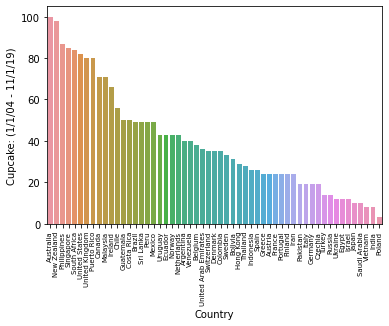

In [83]:
# Bar plot of total Cupcake within specified dates per country

plot3 = sns.barplot(x='Country', y='Cupcake: (1/1/04 - 11/1/19)', data=df1, orient='v')
plot3 = plt.xticks(rotation=90, fontsize='x-small')